# **FEATURE SELECTION**

In this notebook, we will explore a mechanism to discover important features to classify a dataset. The method uses a random forest to estimate the importance of the different predictors. Then, the least important features are removed, and the importance is reevaluated. This process is iterated until no variable is left. This method was first published at

L. Guerrero, J. Vindel-Alfageme, L. Hierro, L. Stark, D. Vicent, C.O.S. Sorzano, F. Corrales. Discrimination of etiologically different cholestasis by machine learning-based modeling of proteomics datasets. Intl. J. Molecular Sciences, 25: 3684 (2024) https://www.mdpi.com/1422-0067/25/7/3684

The method is illustrated with MNIST, and at the end of the notebook there is a function to perform it on any new dataset.

In [1]:
import numpy as np

# Load MNIST
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [2]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
print(train_y[:9])

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
[5 0 4 1 9 2 1 3 1]


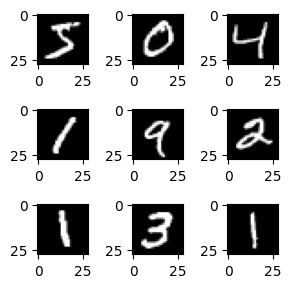

In [3]:
import matplotlib.pyplot as plt

def plot_images(train_X, shape):
  fig, axs = plt.subplots(3, 3, figsize=(3, 3))  # Create a 3x3 grid of subplots
  for i in range(9):
      row = i // 3  # Row index
      col = i % 3   # Column index
      axs[row, col].imshow(np.reshape(train_X[i],(shape[1],shape[2])), cmap=plt.get_cmap('gray'))  # Example plot

  plt.tight_layout()  # Adjust layout to avoid overlapping
  plt.show()
plot_images(train_X, train_X.shape)

Now, we will reshape the arrays to vectors to train the random forest.

In [4]:
class_k=1
train_X_reshaped = train_X.reshape(train_X.shape[0], train_X.shape[1]*train_X.shape[2])
train_y_new = np.where(train_y == class_k, 1, 0)

In [5]:
from sklearn.ensemble import RandomForestClassifier

alpha=0.1
def calculateImportance(train_X_reshaped,train_y_new, N=1):
  clf = RandomForestClassifier(class_weight='balanced')
  importance=np.zeros(train_X.shape[1]*train_X.shape[2])
  for n in range(N):
    clf.fit(train_X_reshaped, train_y_new);
    importance+=clf.feature_importances_
    classification_error = np.sum(clf.predict(train_X_reshaped) != train_y_new) / len(train_y_new)
    print("n=%d error=%f"%(n,classification_error))

  importance = importance / N
  return importance

def trimX(importance, alpha, train_X_reshaped, shape):
  num_features_to_zero = int(alpha * len(importance))  # Calculate 10% of total features
  print("Removing %d features"%num_features_to_zero)
  smallest_indices = np.argsort(importance)[:num_features_to_zero]
  train_X_reshaped[:, smallest_indices] = 0

  import matplotlib.pyplot as plt
  fig, ax = plt.subplots(figsize=(3, 3))
  mask = np.zeros_like(importance)
  mask[smallest_indices] = 1
  ax.imshow(np.reshape(mask,(shape[1],shape[2])), cmap=plt.get_cmap('gray'));
  plt.show()

  return train_X_reshaped


n=0 error=0.000000


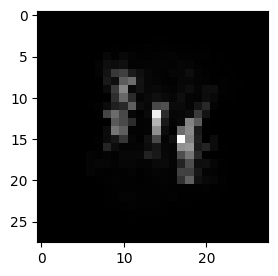

In [6]:
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList=[importance]
def show_importance(importance, shape):
  import matplotlib.pyplot as plt
  fig, ax = plt.subplots(figsize=(3, 3))
  ax.imshow(np.reshape(importance,(shape[1],shape[2])), cmap=plt.get_cmap('gray'));
show_importance(importance, train_X.shape)

Removing 78 features


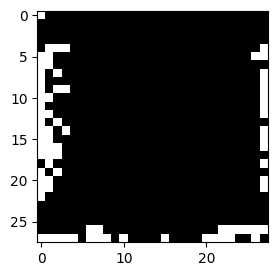

n=0 error=0.000017


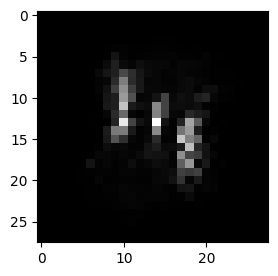

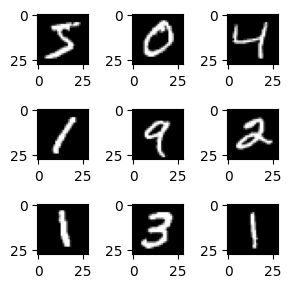

In [7]:
from math import pow
iter=1
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 148 features


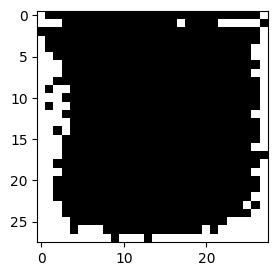

n=0 error=0.000000


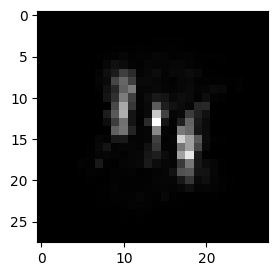

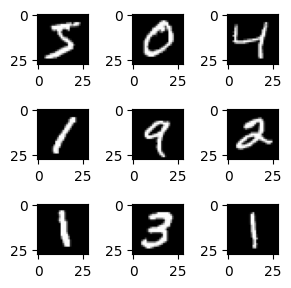

In [8]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 212 features


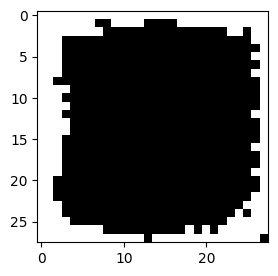

n=0 error=0.000000


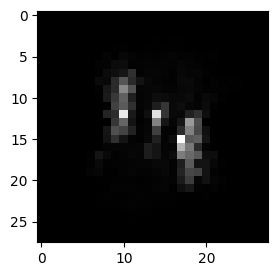

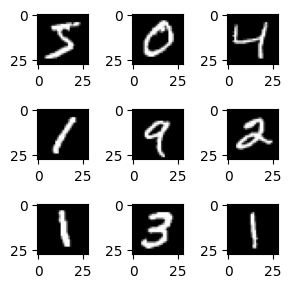

In [9]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 269 features


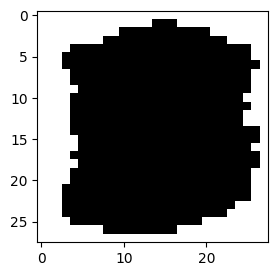

n=0 error=0.000000


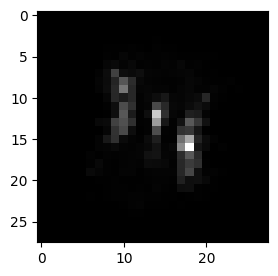

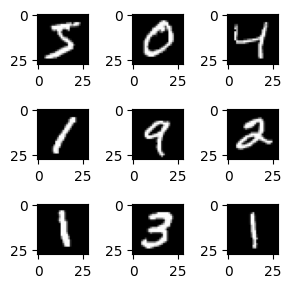

In [10]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 321 features


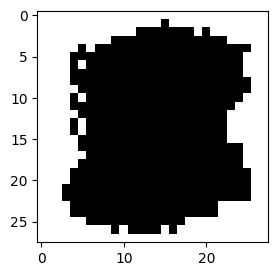

n=0 error=0.000000


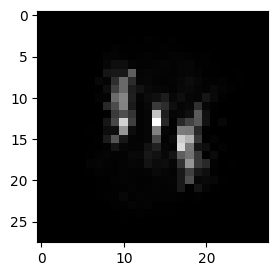

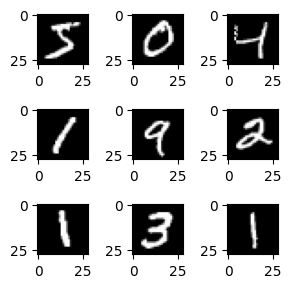

In [11]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 367 features


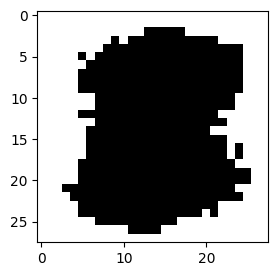

n=0 error=0.000000


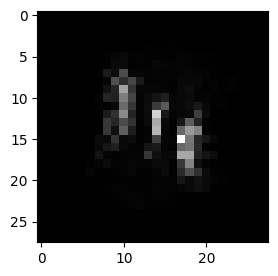

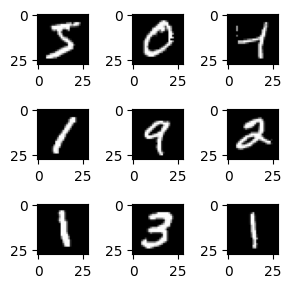

In [12]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 409 features


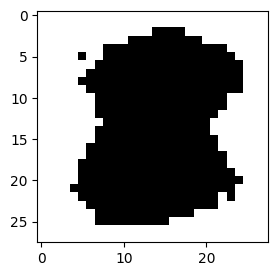

n=0 error=0.000000


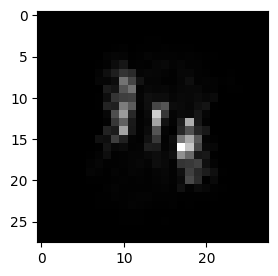

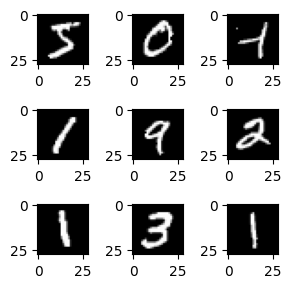

In [13]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 446 features


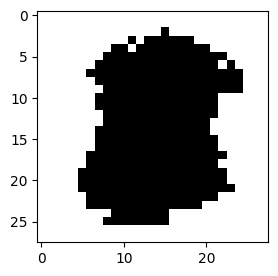

n=0 error=0.000000


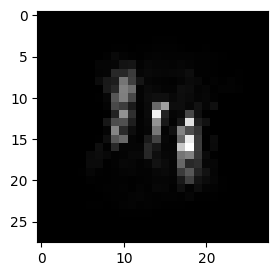

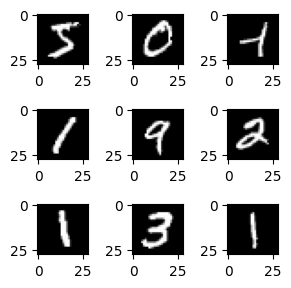

In [14]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 480 features


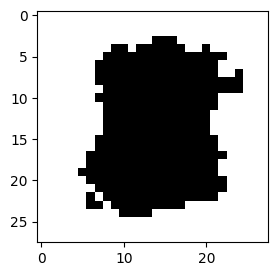

n=0 error=0.000000


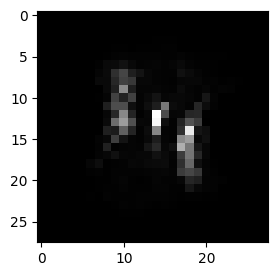

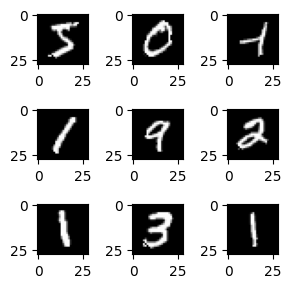

In [15]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 510 features


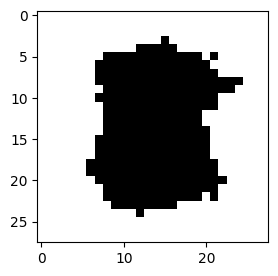

n=0 error=0.000000


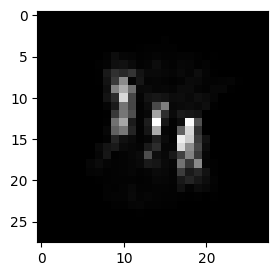

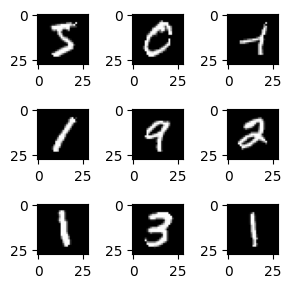

In [16]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 537 features


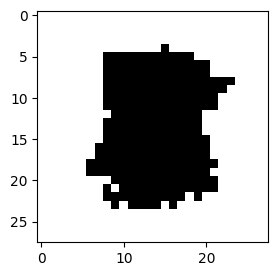

n=0 error=0.000000


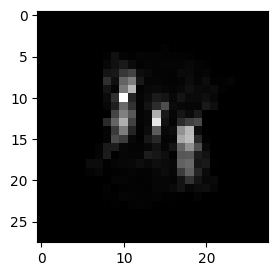

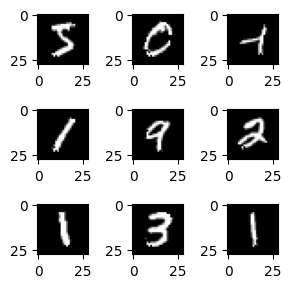

In [17]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 562 features


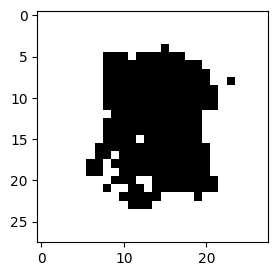

n=0 error=0.000000


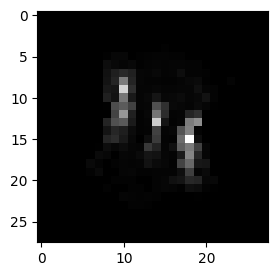

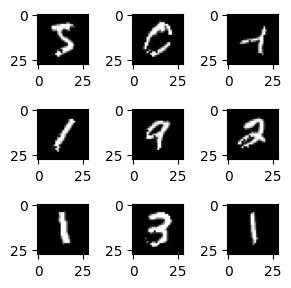

In [18]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 584 features


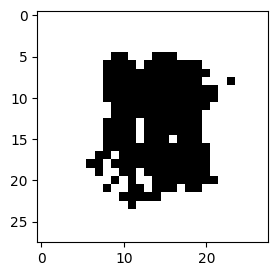

n=0 error=0.000000


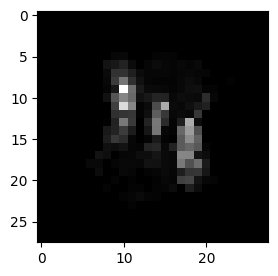

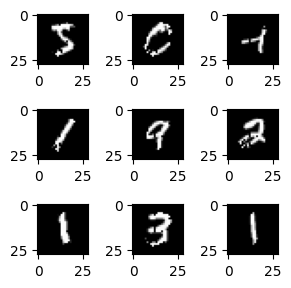

In [19]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 604 features


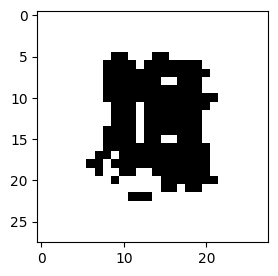

n=0 error=0.000017


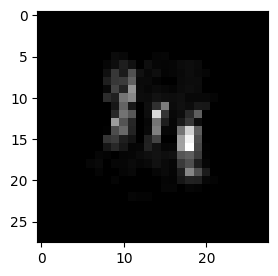

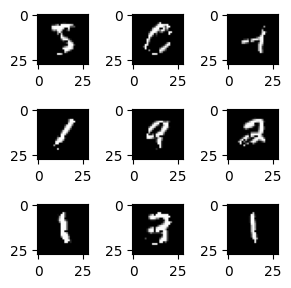

In [20]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 622 features


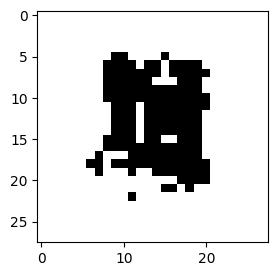

n=0 error=0.000000


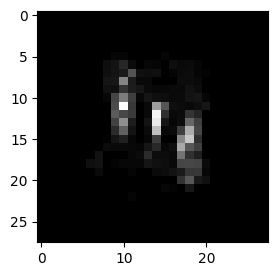

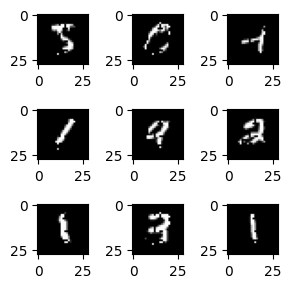

In [21]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 638 features


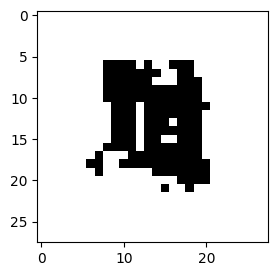

n=0 error=0.000000


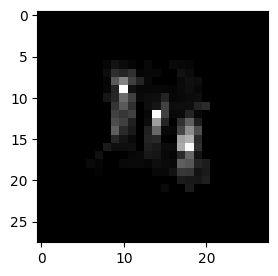

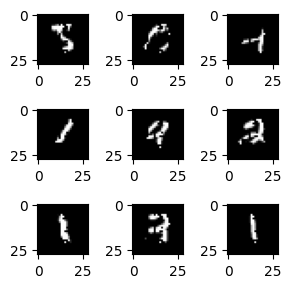

In [22]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 653 features


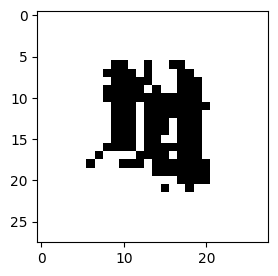

n=0 error=0.000000


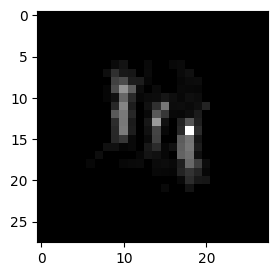

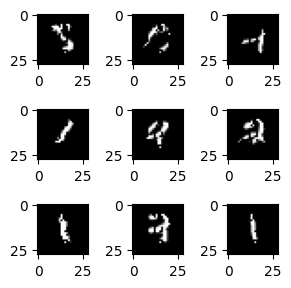

In [23]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 666 features


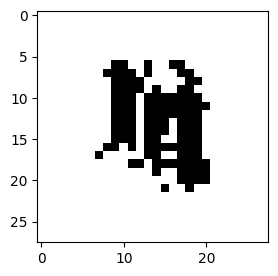

n=0 error=0.000000


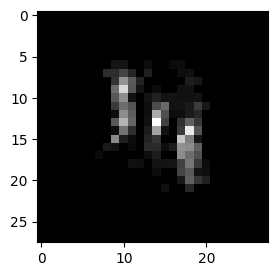

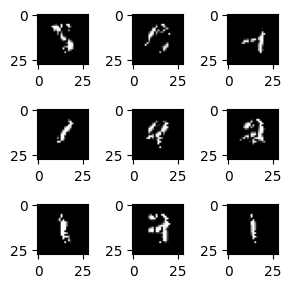

In [24]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 678 features


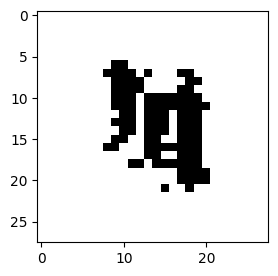

n=0 error=0.000000


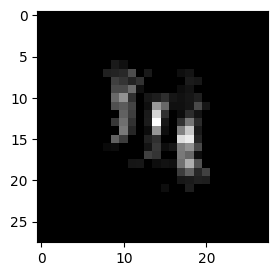

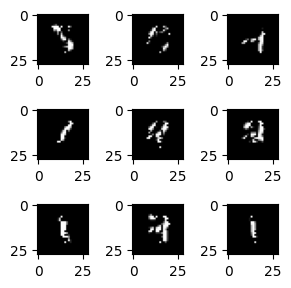

In [25]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 688 features


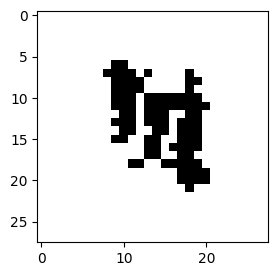

n=0 error=0.000000


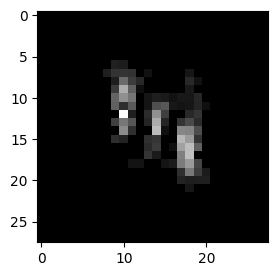

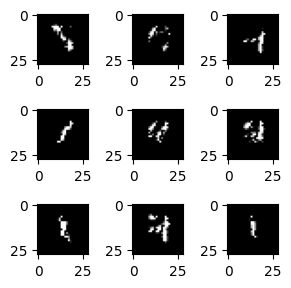

In [26]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 698 features


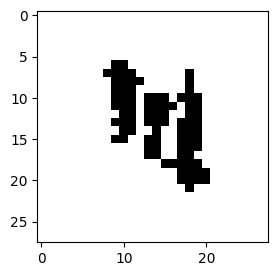

n=0 error=0.000000


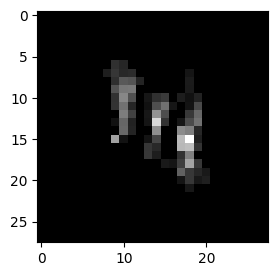

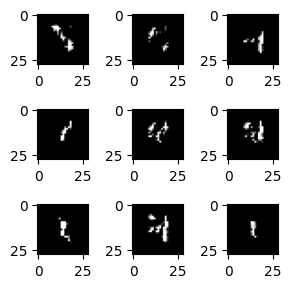

In [27]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 706 features


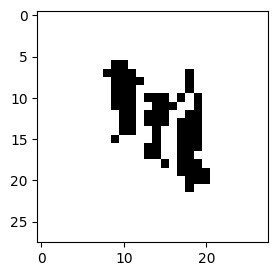

n=0 error=0.000000


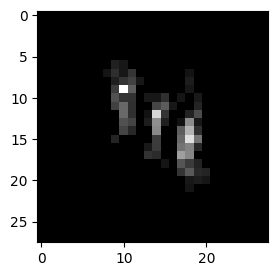

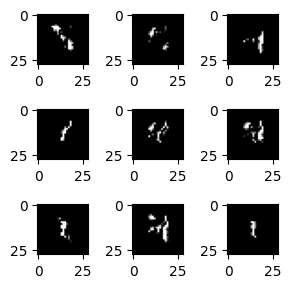

In [28]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 714 features


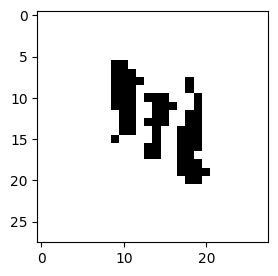

n=0 error=0.000000


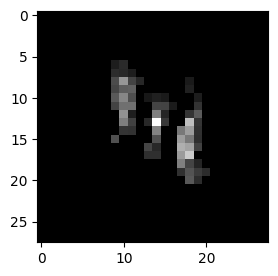

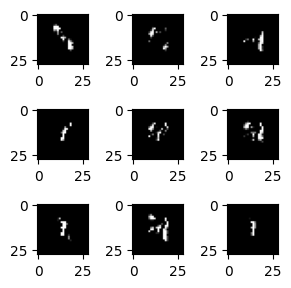

In [29]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 721 features


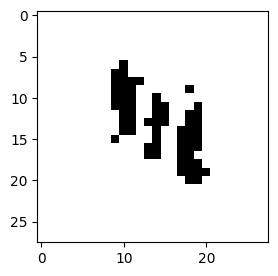

n=0 error=0.000033


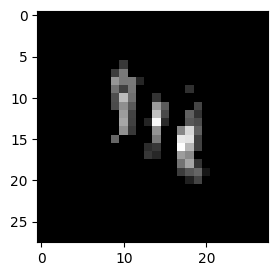

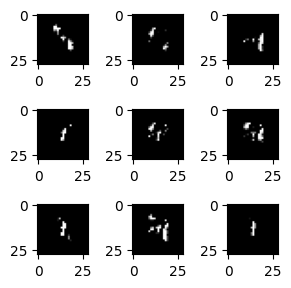

In [30]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 727 features


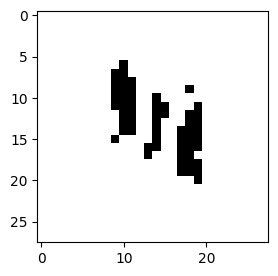

n=0 error=0.000017


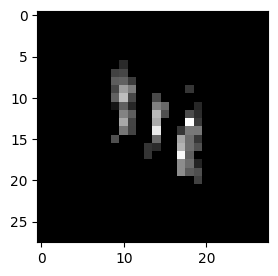

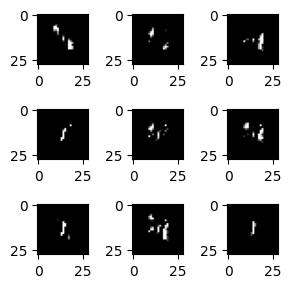

In [31]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 733 features


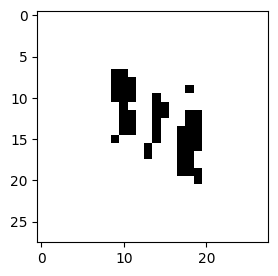

n=0 error=0.000033


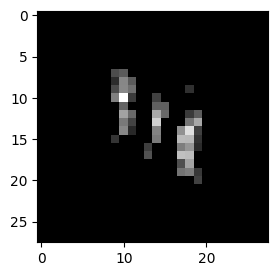

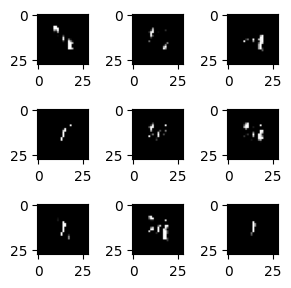

In [32]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 738 features


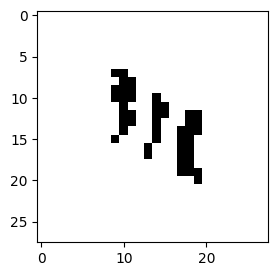

n=0 error=0.000050


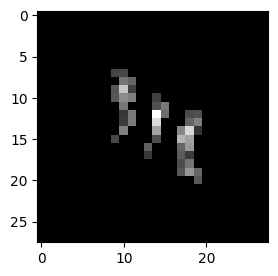

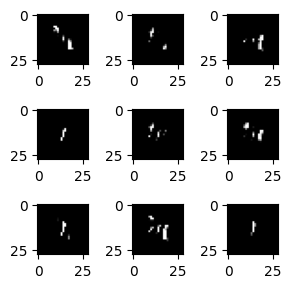

In [33]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 742 features


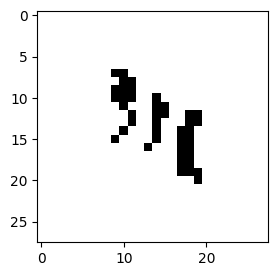

n=0 error=0.000067


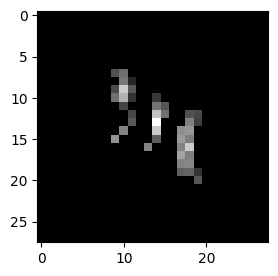

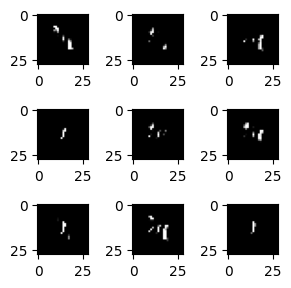

In [34]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 747 features


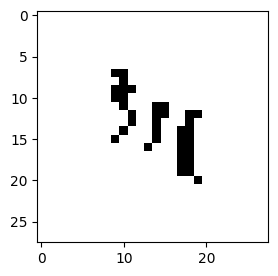

n=0 error=0.000100


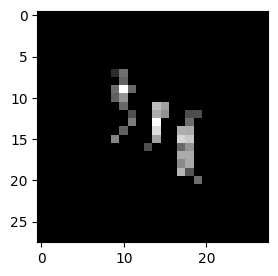

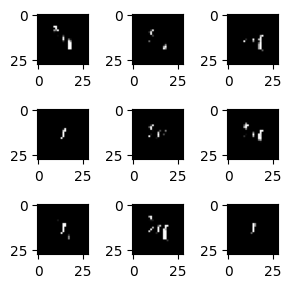

In [35]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

Removing 750 features


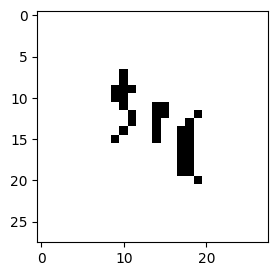

n=0 error=0.000233


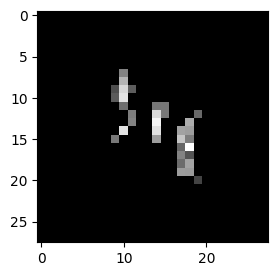

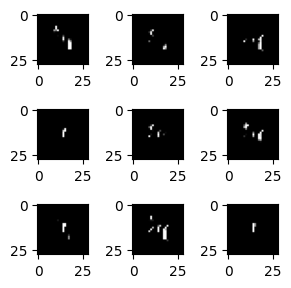

In [36]:
train_X_reshaped=trimX(importance,1-pow(1-alpha,iter),train_X_reshaped,
                       train_X.shape)
importance = calculateImportance(train_X_reshaped,train_y_new)
importanceList.append(importance)
show_importance(importance, train_X.shape)
plot_images(train_X_reshaped, train_X.shape)
iter+=1

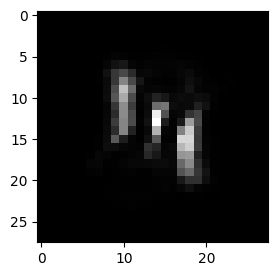

In [37]:
cumulativeImportance = np.sum(importanceList, axis=0)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(np.reshape(cumulativeImportance,(train_X.shape[1],train_X.shape[2])), cmap=plt.get_cmap('gray'));

In [52]:
def COSSfilter(X, y, featureDecay=0.1, Ntrees=100, verbose=False):
  """
  Parameters:
    X (ndarray): A NumPy array of shape (n_samples, n_features) representing
      the feature matrix. Each row is a sample, and each column is a feature.
    y (ndarray): A NumPy array of shape (n_samples,) representing the target
      labels (or class labels) for each sample.
    featureDecay (float, default=0.1): A fraction that controls the rate at
      which features are removed during each iteration. The value represents
      the proportion of features to be removed from the currently active set
      of features. For example, featureDecay=0.1 removes 10% of the features
      in each iteration.
    Ntrees (int, default=100): The number of trees used in the
      RandomForestClassifier. This parameter controls how many decision trees
      the Random Forest model will use when computing feature importances.
    verbose (bool, default=False): A flag to indicate whether progress and
      details of the filtering process should be printed during execution.
      If set to True, debug information such as the number of features being
      removed, the error rates, and thresholds will be displayed.
  Returns:
    cumulatedImportance (ndarray):
      A NumPy array of size (n_features,) representing the accumulated feature
      importance scores from all iterations of the algorithm. This array allows
      you to observe how important each feature was throughout the process.
  """
  import numpy as np
  def calculateImportance(X, y, mask, Ntrees, verbose=False):
    from sklearn.ensemble import RandomForestClassifier
    idx=mask==1;
    Xfit = X[:,idx]
    clf = RandomForestClassifier(class_weight='balanced', n_estimators=Ntrees)
    clf.fit(Xfit, y);
    if verbose:
      classification_error = np.sum(clf.predict(Xfit) != y) / len(y)
      print("error=%f"%classification_error)
    importance=np.zeros(X.shape[1])
    importance[idx]=clf.feature_importances_
    return importance

  def trimX(importance, featureDecay, mask, verbose=False):
    importance_mask = importance[mask==1]
    num_features_to_zero = max(1,int(featureDecay * len(importance_mask)))
    if verbose:
      print("Removing %d features"%num_features_to_zero)
    threshold = np.sort(importance_mask)[num_features_to_zero-1]
    new_mask = mask.copy()
    if verbose:
      print("Importance threshold: %f"%threshold)
    new_mask[importance <= threshold] = 0
    return new_mask

  mask=np.ones(X.shape[1], dtype=np.int16)
  cumulatedImportance=None
  while np.sum(mask)>1:
    if verbose:
      print("Mask %d"%np.sum(mask))
    importance = calculateImportance(X, y, mask, Ntrees, verbose)
    mask = trimX(importance, featureDecay, mask, verbose)
    if cumulatedImportance is None:
      cumulatedImportance=importance
    else:
      cumulatedImportance+=importance
  return cumulatedImportance/np.max(cumulatedImportance)

from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
class_k=1
train_X_reshaped = train_X.reshape(train_X.shape[0], train_X.shape[1]*train_X.shape[2])
train_y_new = np.where(train_y == class_k, 1, 0)
cumulatedImportance = COSSfilter(train_X_reshaped, train_y_new, verbose=True)

Mask 784
error=0.000000
Removing 78 features
Importance threshold: 0.000000
Mask 604
error=0.000000
Removing 60 features
Importance threshold: 0.000000
Mask 544
error=0.000000
Removing 54 features
Importance threshold: 0.000003
Mask 490
error=0.000017
Removing 49 features
Importance threshold: 0.000012
Mask 441
error=0.000000
Removing 44 features
Importance threshold: 0.000026
Mask 397
error=0.000000
Removing 39 features
Importance threshold: 0.000061
Mask 358
error=0.000000
Removing 35 features
Importance threshold: 0.000101
Mask 323
error=0.000000
Removing 32 features
Importance threshold: 0.000161
Mask 291
error=0.000000
Removing 29 features
Importance threshold: 0.000216
Mask 262
error=0.000000
Removing 26 features
Importance threshold: 0.000308
Mask 236
error=0.000000
Removing 23 features
Importance threshold: 0.000408
Mask 213
error=0.000000
Removing 21 features
Importance threshold: 0.000497
Mask 192
error=0.000000
Removing 19 features
Importance threshold: 0.000649
Mask 173
err

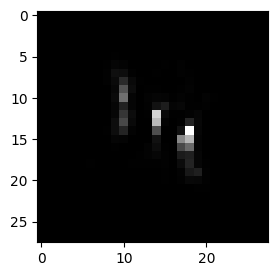

In [53]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(np.reshape(cumulatedImportance,(train_X.shape[1],train_X.shape[2])), cmap=plt.get_cmap('gray'));

Now, we repeat it but looking at all labels at the same time.

In [54]:
cumulatedImportance = COSSfilter(train_X_reshaped, train_y, verbose=True)

Mask 784
error=0.000000
Removing 78 features
Importance threshold: 0.000000
Mask 671
error=0.000000
Removing 67 features
Importance threshold: 0.000003
Mask 604
error=0.000000
Removing 60 features
Importance threshold: 0.000012
Mask 544
error=0.000000
Removing 54 features
Importance threshold: 0.000050
Mask 490
error=0.000000
Removing 49 features
Importance threshold: 0.000118
Mask 441
error=0.000000
Removing 44 features
Importance threshold: 0.000261
Mask 397
error=0.000000
Removing 39 features
Importance threshold: 0.000508
Mask 358
error=0.000000
Removing 35 features
Importance threshold: 0.000711
Mask 323
error=0.000000
Removing 32 features
Importance threshold: 0.001156
Mask 291
error=0.000000
Removing 29 features
Importance threshold: 0.001425
Mask 262
error=0.000000
Removing 26 features
Importance threshold: 0.001755
Mask 236
error=0.000000
Removing 23 features
Importance threshold: 0.002173
Mask 213
error=0.000000
Removing 21 features
Importance threshold: 0.002721
Mask 192
err

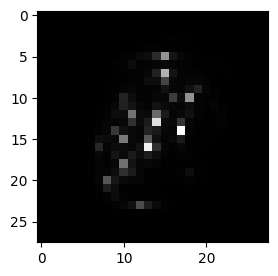

In [55]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(np.reshape(cumulatedImportance,(train_X.shape[1],train_X.shape[2])), cmap=plt.get_cmap('gray'));